<a href="https://colab.research.google.com/github/Ananya-Sharma0081/Group2_COVID-19-case-prediction-model/blob/main/Group2_COVID-19_case_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


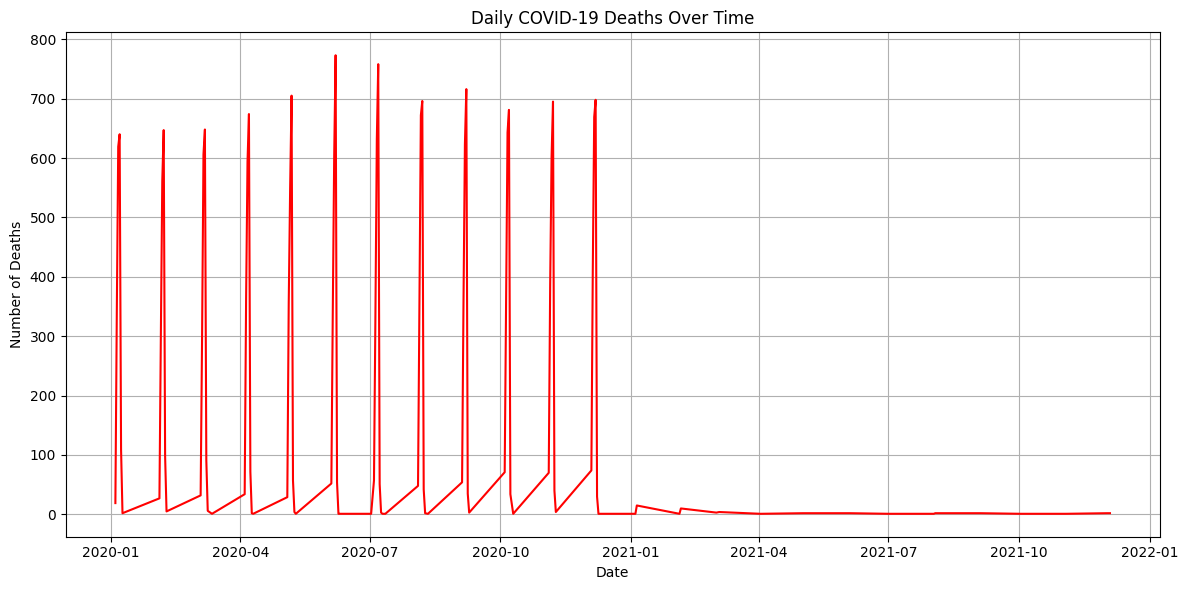

In [ ]:
#Step 2
# Load the dataset
df = pd.read_csv("Covid Data.csv")

# Convert DATE_DIED to datetime and remove invalid entries
df["DATE_DIED"] = pd.to_datetime(df["DATE_DIED"], errors='coerce')
df = df.dropna(subset=["DATE_DIED"])

# Filter only confirmed COVID-19 cases (classification 1, 2, 3)
confirmed = df[df["CLASIFFICATION_FINAL"].isin([1, 2, 3])]

# Count deaths by date
daily_deaths = confirmed.groupby("DATE_DIED").size().reset_index(name="deaths")

# Plot deaths over time
plt.figure(figsize=(12, 6))
plt.plot(daily_deaths["DATE_DIED"], daily_deaths["deaths"], color='red')
plt.title("Daily COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Step 3: Load and clean the data
df = pd.read_csv("Covid Data.csv")

# Convert date column
df["DATE_DIED"] = pd.to_datetime(df["DATE_DIED"], errors="coerce")
df = df.dropna(subset=["DATE_DIED"])

# Filter confirmed cases
confirmed = df[df["CLASIFFICATION_FINAL"].isin([1, 2, 3])]

# Group by date and count daily cases
daily_cases = confirmed.groupby("DATE_DIED").size().reset_index(name="cases")
daily_cases = daily_cases.set_index("DATE_DIED").asfreq("D", fill_value=0)


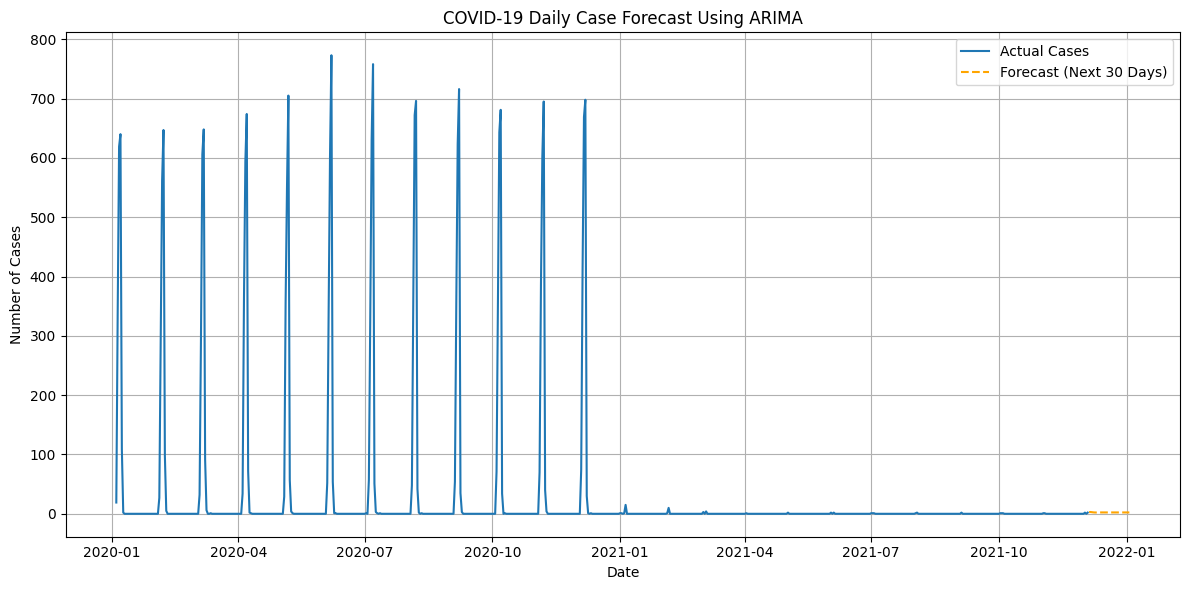

In [ ]:
# Step 4: Visualize actual vs forecasted data
plt.figure(figsize=(12, 6))
plt.plot(daily_cases.index, daily_cases["cases"], label="Actual Cases")
plt.plot(forecast_dates, forecast, label="Forecast (Next 30 Days)", linestyle="--", color="orange")
plt.title("COVID-19 Daily Case Forecast Using ARIMA")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
